ANALISIS DEL RANKING DE BGG A FECHA DE 2022 NOV 1

In [1]:
#!pip install plotly --upgrade

Importación de modulos y librerías

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Importación de los dataframes

In [3]:
BGG_df = pd.read_csv('/Users/nickkempe/Documents/GitHub/WORK_FILE_ds_ft_sep_22/2-Data_Analysis/Entregas/EDA/BGG/all_final/BGG_top_full_2022_11_01.csv')
#BGG_df.head()

#MECH_df = pd.read_csv('all_mechanics_2022_11_01.csv')
#MECH_df.head()

#CAT_df = pd.read_csv('all_categories_2022_11_01.csv')
#CAT_df.head()

In [4]:
BGG_df.keys()

Index(['game_id', 'name', 'ranking', 'expansion', 'accessory', 'categories',
       'mechanics', 'yearpublished', 'minplayers', 'maxplayers', 'playingtime',
       'minplaytime', 'maxplaytime', 'minage', 'usersrate', 'average',
       'bayesaverage', 'stddev', 'numcomments', 'numweights', 'averageweight',
       'votes_suggested_players', 'recom_plyrs_int', 'votes_best_players'],
      dtype='object')

In [5]:
#print(CAT_df.shape)
#print(MECH_df.shape)
print(BGG_df.categories[0])
print(BGG_df.mechanics[0])

['Adventure', 'Exploration', 'Fantasy', 'Fighting', 'Miniatures']
['Action Queue', 'Action Retrieval', 'Campaign / Battle Card Driven', 'Card Play Conflict Resolution', 'Communication Limits', 'Cooperative Game', 'Critical Hits and Failures', 'Deck Construction', 'Grid Movement', 'Hand Management', 'Hexagon Grid', 'Legacy Game', 'Line of Sight', 'Modular Board', 'Once-Per-Game Abilities', 'Role Playing', 'Scenario / Mission / Campaign Game', 'Simultaneous Action Selection', 'Solo / Solitaire Game', 'Storytelling', 'Variable Player Powers']


In [6]:
#print(CAT_df)

In [7]:
BGG_df.categories[0]

"['Adventure', 'Exploration', 'Fantasy', 'Fighting', 'Miniatures']"

Get_dummies testing with categories

In [8]:
BGG_df["categories"] = BGG_df['categories'].str.replace("[","").str.replace("]","").str.replace("'","").str.replace('"','')
#is strip right here?

In [9]:
print(type(BGG_df["categories"][0]))
BGG_df["categories"][10]

<class 'str'>


'Fantasy, Fighting, Mythology, Territory Building'

In [10]:
for i in BGG_df["categories"]:
    BGG_df["categories"] = BGG_df["categories"].str.strip()

In [11]:
CAT_count = BGG_df['categories'].str.get_dummies(',')

In [12]:
print(len(CAT_count.keys()))
CAT_count.keys()[0].strip()

145


'Adventure'

In [13]:
CAT_count.columns = CAT_count.columns.str.strip()

In [14]:
CAT_count.keys()[0]

'Adventure'

In [15]:
CAT_count.iloc[0]

Adventure                     0
American Indian Wars          0
American Revolutionary War    0
American West                 0
Ancient                       0
                             ..
Transportation                0
Travel                        0
Trivia                        0
Video Game Theme              0
Wargame                       0
Name: 0, Length: 145, dtype: int64

In [16]:
topcat = CAT_count.sum(axis=0).sort_values(ascending=False).head(20)

In [17]:
#print(len(topcat[1]))
topcat.keys()[1]

'Fantasy'

In [18]:
topcat.head(20)
#cleanup spacing

Card Game             280
Fantasy               255
Fighting              194
Science Fiction       178
Adventure             145
Economic              134
Miniatures            128
Economic              126
Exploration           124
Card Game             120
Wargame               115
Medieval              110
Territory Building    104
Ancient                85
Animals                77
Bluffing               75
City Building          73
Abstract Strategy      72
Horror                 71
Deduction              71
dtype: int64

In [19]:
print(type(topcat))
topcat.shape

<class 'pandas.core.series.Series'>


(20,)

In [21]:
numcat = CAT_count.sum(axis=1)

In [22]:
numcat

0       5
1       4
2       2
3       3
4       6
       ..
1495    3
1496    5
1497    5
1498    3
1499    1
Length: 1500, dtype: int64

In [23]:
BGG_df["numcat"] = numcat

Top Three Categories

In [24]:
cardgame_df = BGG_df.loc[BGG_df["categories"].str.contains("Card Game")]

In [25]:
cardgame_df

,game_id,name,ranking,expansion,accessory,categories,mechanics,yearpublished,minplayers,maxplayers,...,average,bayesaverage,stddev,numcomments,numweights,averageweight,votes_suggested_players,recom_plyrs_int,votes_best_players,numcat
11,182028,Through the Ages: A New Story of Civilization,12,False,False,"Card Game, Civilization, Economic","['Action Points', 'Auction/Bidding', 'Auction:...",2015,2,4,...,8.34537,8.11707,1.51244,4101,1373,4.4246,641,3,410,3
17,173346,7 Wonders Duel,18,False,False,"Ancient, Card Game, City Building, Civilizatio...","['Layering', 'Open Drafting', 'Set Collection'...",2015,2,2,...,8.10084,7.97781,1.18563,10501,2447,2.2227,1042,2,1006,5
23,266192,Wingspan,24,False,False,"Animals, Card Game, Educational","['Contracts', 'Dice Rolling', 'End Game Bonuse...",2019,1,5,...,8.08091,7.92987,1.34555,9410,2319,2.4442,1389,3,774,3
25,205637,Arkham Horror: The Card Game,26,False,False,"Adventure, Card Game, Collectible Components, ...","['Action Points', 'Area Movement', 'Communicat...",2016,1,2,...,8.15016,7.91992,1.52053,5839,1203,3.5121,878,2,607,6
30,199792,Everdell,31,False,False,"Animals, Card Game, City Building, Fantasy","['Contracts', 'End Game Bonuses', 'Hand Manage...",2018,1,4,...,8.07519,7.87759,1.28094,5146,1141,2.8054,653,3,330,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,226501,Dragonfire,1488,False,False,"Card Game, Fantasy","['Cooperative Game', 'Deck, Bag, and Pool Buil...",2017,2,6,...,7.17329,6.32687,1.63572,621,86,3.2209,81,4,47,2
1489,245354,Unlock!: Secret Adventures – The Adventurers o...,1490,False,False,"Card Game, Exploration, Puzzle, Real-time","['Cooperative Game', 'Storytelling']",2018,1,6,...,7.39750,6.32622,1.41918,242,16,2.8750,17,3,8,4
1494,329845,Stella: Dixit Universe,1495,False,False,"Card Game, Party Game","['Deduction', 'Push Your Luck', 'Real-Time']",2021,3,6,...,7.29017,6.32451,1.25276,268,43,1.1395,27,5,17,2
1495,303553,Skulls of Sedlec,1496,False,False,"Card Game, Print & Play, Renaissance","['Open Drafting', 'Pattern Building', 'Set Col...",2020,1,4,...,7.50211,6.32415,1.02200,330,25,1.3200,26,2,20,3


In [26]:
fantasy_df = BGG_df.loc[BGG_df["categories"].str.contains("Fantasy")]

In [27]:
fighting_df = BGG_df.loc[BGG_df["categories"].str.contains("Fighting")]

In [28]:
# df.describe() for full stats
print(cardgame_df.recom_plyrs_int.mean())
print(fantasy_df.recom_plyrs_int.mean())
print(fighting_df.recom_plyrs_int.mean())
print(cardgame_df.recom_plyrs_int.mode())
print(fantasy_df.recom_plyrs_int.mode())
print(fighting_df.recom_plyrs_int.mode())

3.18
3.1687898089171975
3.2883720930232556
0    2
Name: recom_plyrs_int, dtype: int64
0    2
1    4
Name: recom_plyrs_int, dtype: int64
0    2
Name: recom_plyrs_int, dtype: int64


In [29]:
print(cardgame_df.playingtime.mean())
print(fantasy_df.playingtime.mean())
print(fighting_df.playingtime.mean())
print(cardgame_df.playingtime.mode())
print(fantasy_df.playingtime.mode())
print(fighting_df.playingtime.mode())
print(cardgame_df.playingtime.max())
print(fantasy_df.playingtime.max())
print(fighting_df.playingtime.max())

55.3375
88.37898089171975
94.18604651162791
0    30
Name: playingtime, dtype: int64
0    60
Name: playingtime, dtype: int64
0    60
Name: playingtime, dtype: int64
1000
1200
360


In [30]:
BGG_df[["playingtime", "name", "ranking"]].sort_values("playingtime", ascending=False).head(20)
#for presentation show Sleeping Gods, The Civil War 1861-1865 and Mega Civilization. Twilight Imperium too

,playingtime,name,ranking
1479,1200,The Civil War 1861-1865,1480
81,1200,Sleeping Gods,82
1392,1000,The 7th Continent: Classic Edition,1393
70,1000,The 7th Continent,71
1056,999,Legacy of Dragonholt,1057
1473,900,RAF: The Battle of Britain 1940,1474
1252,720,Mega Civilization,1253
193,480,Paths of Glory,194
638,480,D-Day at Omaha Beach,639
385,480,Advanced Squad Leader,386


In [31]:
BGG_df[["minplaytime", "name", "ranking"]].sort_values("minplaytime", ascending=False).head(20)

,minplaytime,name,ranking
193,480,Paths of Glory,194
823,420,Virgin Queen,824
1366,360,Axis & Allies Pacific 1940,1367
1072,360,For the People,1073
740,360,Empire of the Sun,741
1419,360,Sword of Rome,1420
1252,360,Mega Civilization,1253
690,360,Diplomacy,691
1071,360,Andean Abyss,1072
1067,360,No Retreat! The Russian Front,1068


In [32]:
print(cardgame_df.minplaytime.mean())
print(fantasy_df.minplaytime.mean())
print(fighting_df.minplaytime.mean())
print(cardgame_df.minplaytime.mode())
print(fantasy_df.minplaytime.mode())
print(fighting_df.minplaytime.mode())
print(cardgame_df.minplaytime.max())
print(fantasy_df.minplaytime.max())
print(fighting_df.minplaytime.max())

36.455
54.81210191082803
66.72093023255815
0    30
Name: minplaytime, dtype: int64
0    30
Name: minplaytime, dtype: int64
0    60
Name: minplaytime, dtype: int64
180
240
360


In [33]:
print(cardgame_df.average.mean())
print(fantasy_df.average.mean())
print(fighting_df.average.mean())

7.326004474999994
7.485005382165601
7.507589162790696


In [34]:
print(cardgame_df.ranking.mean())
print(fantasy_df.ranking.mean())
print(fighting_df.ranking.mean())

802.85
740.640127388535
703.060465116279


In [35]:
print(cardgame_df.averageweight.mean())
print(fantasy_df.averageweight.mean())
print(fighting_df.averageweight.mean())

2.1702265000000014
2.60705127388535
2.7218283720930208


Top Three Mechanics

In [42]:
BGG_df["mechanics"][33]
#include screen shot of mechs from BGG advanced search

"['Deck, Bag, and Pool Building', 'Delayed Purchase', 'Income', 'Market', 'Modular Board', 'Open Drafting', 'Simultaneous Action Selection', 'Victory Points as a Resource']"

In [43]:
BGG_df["mechanics"] = BGG_df["mechanics"].replace(regex=['Deck, Bag, and Pool Building'],value='Deck Bag and Pool Building')

In [44]:
#tira esta tb
BGG_df["mechanics"] = BGG_df["mechanics"].replace(regex=['I Cut, You Choose'],value='I Cut You Choose')
BGG_df["mechanics"] = BGG_df["mechanics"].replace(regex=['Worker Placement, Different Worker Types'],value='Worker Placement Different Worker Types')

In [45]:
BGG_df["mechanics"][33]

"['Deck Bag and Pool Building', 'Delayed Purchase', 'Income', 'Market', 'Modular Board', 'Open Drafting', 'Simultaneous Action Selection', 'Victory Points as a Resource']"

In [46]:
BGG_df["mechanics"] = BGG_df['mechanics'].str.replace("[","").str.replace("]","").str.replace("'","").str.replace('"','')
#is strip right here?
BGG_df["mechanics"] = BGG_df["mechanics"].str.lstrip()
MECH_count = BGG_df['mechanics'].str.get_dummies(',')
MECH_count.columns = MECH_count.columns.str.strip()

In [47]:
topmech = MECH_count.sum(axis=0).sort_values(ascending=False).head(20)
#need to clean this up. spaces and returns and other bullshit
#esp look at Grid Movement and Pool Building Bag

#Deck, Bag, and Pool Building

In [48]:
topmech

Variable Player Powers           458
Hand Management                  456
Dice Rolling                     351
Set Collection                   332
Open Drafting                    295
Solo / Solitaire Game            284
Modular Board                    246
Tile Placement                   219
Area Majority / Influence        209
Worker Placement                 183
Action Points                    169
Grid Movement                    149
Variable Set-up                  132
Simultaneous Action Selection    129
Cooperative Game                 128
Take That                        125
Team-Based Game                  119
Dice Rolling                     116
Cooperative Game                 113
Hexagon Grid                     113
dtype: int64

In [49]:
#out of order?
nummech = MECH_count.sum(axis=1)
#out of order?
BGG_df["nummech"] = nummech

In [50]:
varpowers_df = BGG_df.loc[BGG_df["mechanics"].str.contains("Variable Player Powers")]

In [51]:
handmgmt_df = BGG_df.loc[BGG_df["mechanics"].str.contains("Hand Management")]

In [52]:
diceroll_df = BGG_df.loc[BGG_df["mechanics"].str.contains("Dice Rolling")]

In [53]:
varpowers_df.describe()


,game_id,ranking,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,usersrate,...,bayesaverage,stddev,numcomments,numweights,averageweight,votes_suggested_players,recom_plyrs_int,votes_best_players,numcat,nummech
count,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,...,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000
mean,169242.034934,683.663755,2014.063319,1.753275,4.698690,105.975983,67.484716,105.975983,12.244541,9598.606987,...,6.887789,1.422727,1802.137555,445.851528,2.828033,191.768559,3.462882,118.740175,3.956332,7.460699
std,92557.897769,427.779003,6.722242,0.787095,2.341902,92.121753,49.599322,92.121753,2.134745,13366.969137,...,0.442580,0.168085,2174.704459,714.735767,0.699713,283.923694,1.561201,176.779691,1.622548,3.069506
min,15.000000,1.000000,1977.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,785.000000,...,6.323440,1.069380,113.000000,8.000000,1.114300,7.000000,1.000000,0.000000,1.000000,2.000000
25%,103478.500000,329.500000,2012.000000,1.000000,4.000000,60.000000,30.000000,60.000000,12.000000,2505.000000,...,6.535902,1.298165,595.000000,95.250000,2.310650,54.000000,2.000000,32.000000,3.000000,5.000000
50%,172150.500000,653.500000,2016.000000,2.000000,4.000000,90.000000,60.000000,90.000000,13.000000,4689.500000,...,6.783175,1.412850,1060.500000,209.500000,2.767450,89.000000,3.000000,56.500000,4.000000,7.000000
75%,241333.250000,1050.500000,2018.000000,2.000000,5.000000,120.000000,90.000000,120.000000,14.000000,10382.000000,...,7.107138,1.518415,2032.250000,470.500000,3.314825,202.000000,4.000000,122.000000,5.000000,9.000000
max,349067.000000,1497.000000,2022.000000,8.000000,30.000000,1000.000000,420.000000,1000.000000,18.000000,114792.000000,...,8.457300,2.205890,18058.000000,6185.000000,4.833300,2242.000000,14.000000,1254.000000,10.000000,21.000000


In [54]:
print(varpowers_df.minplaytime.mean())
print(handmgmt_df.minplaytime.mean())
print(diceroll_df.minplaytime.mean())

67.48471615720524
55.88648648648649
77.50535331905782


In [55]:
print(varpowers_df.average.mean())
print(handmgmt_df.average.mean())
print(diceroll_df.average.mean())

7.561019170305674
7.4326015315315255
7.487874304068524


In [56]:
print(varpowers_df.ranking.mean())
print(handmgmt_df.ranking.mean())
print(diceroll_df.ranking.mean())

683.6637554585153
702.1963963963964
741.5396145610279


In [57]:
print(varpowers_df.averageweight.mean())
print(handmgmt_df.averageweight.mean())
print(diceroll_df.averageweight.mean())

2.82803340611354
2.5839781981982
2.738709421841543


First pass: Analisis en Seaborn

In [58]:
BGG_df["averageweight"].mode()

0    2.25
1    3.00
Name: averageweight, dtype: float64

In [59]:
BGG_df["numcat"].mode()

0    2
Name: numcat, dtype: int64

In [60]:
BGG_df["nummech"].mode()

0    5
Name: nummech, dtype: int64

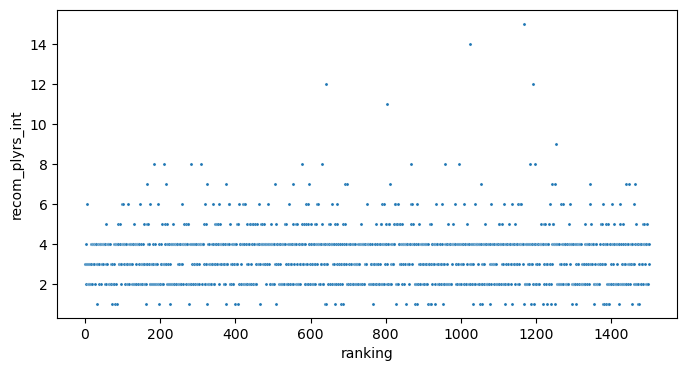

In [61]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=BGG_df['ranking'],
            y=BGG_df['recom_plyrs_int'],
            s=5);            

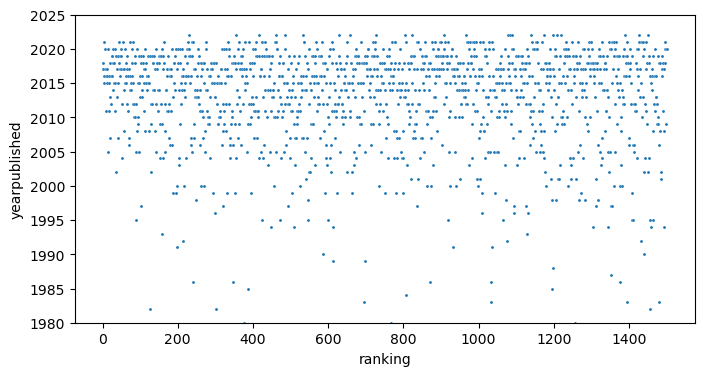

In [62]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=BGG_df['ranking'],
            y=BGG_df['yearpublished'],
            s=5);      
plt.ylim([1980, 2025]);

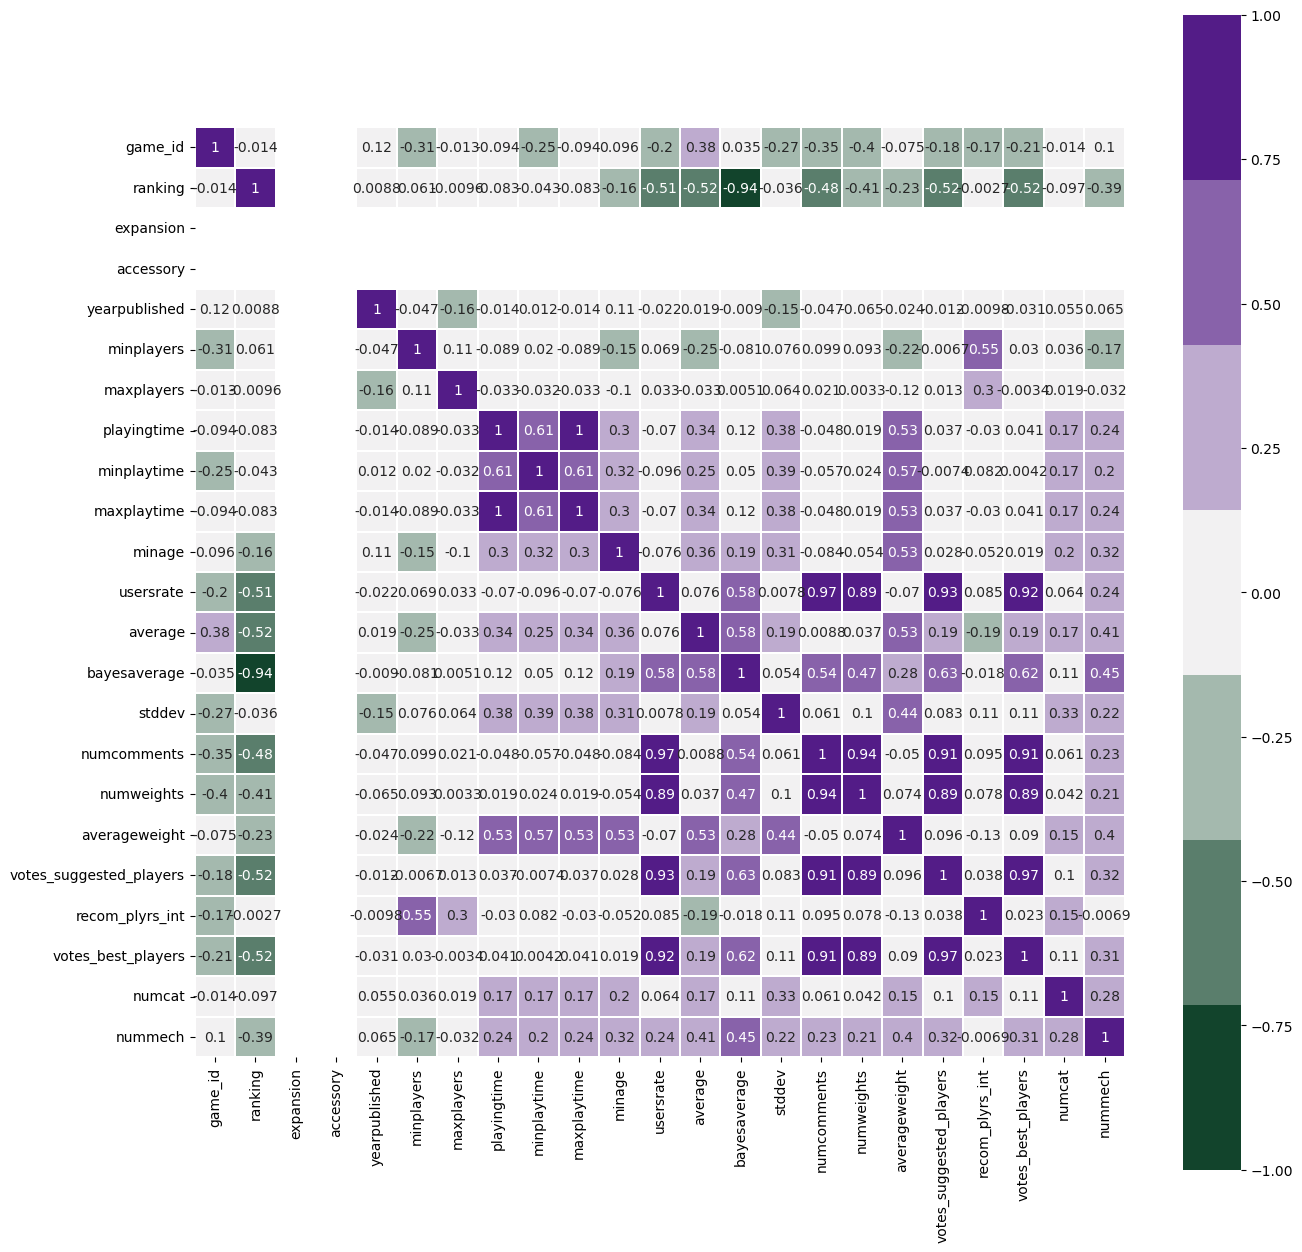

In [63]:
plt.figure(figsize=(15,15))
sns.color_palette("colorblind")
sns.heatmap(BGG_df.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);

In [ ]:
BGG_df.drop('expansion', axis = 1, inplace = True)

In [ ]:
BGG_df.drop('accessory', axis = 1, inplace = True)

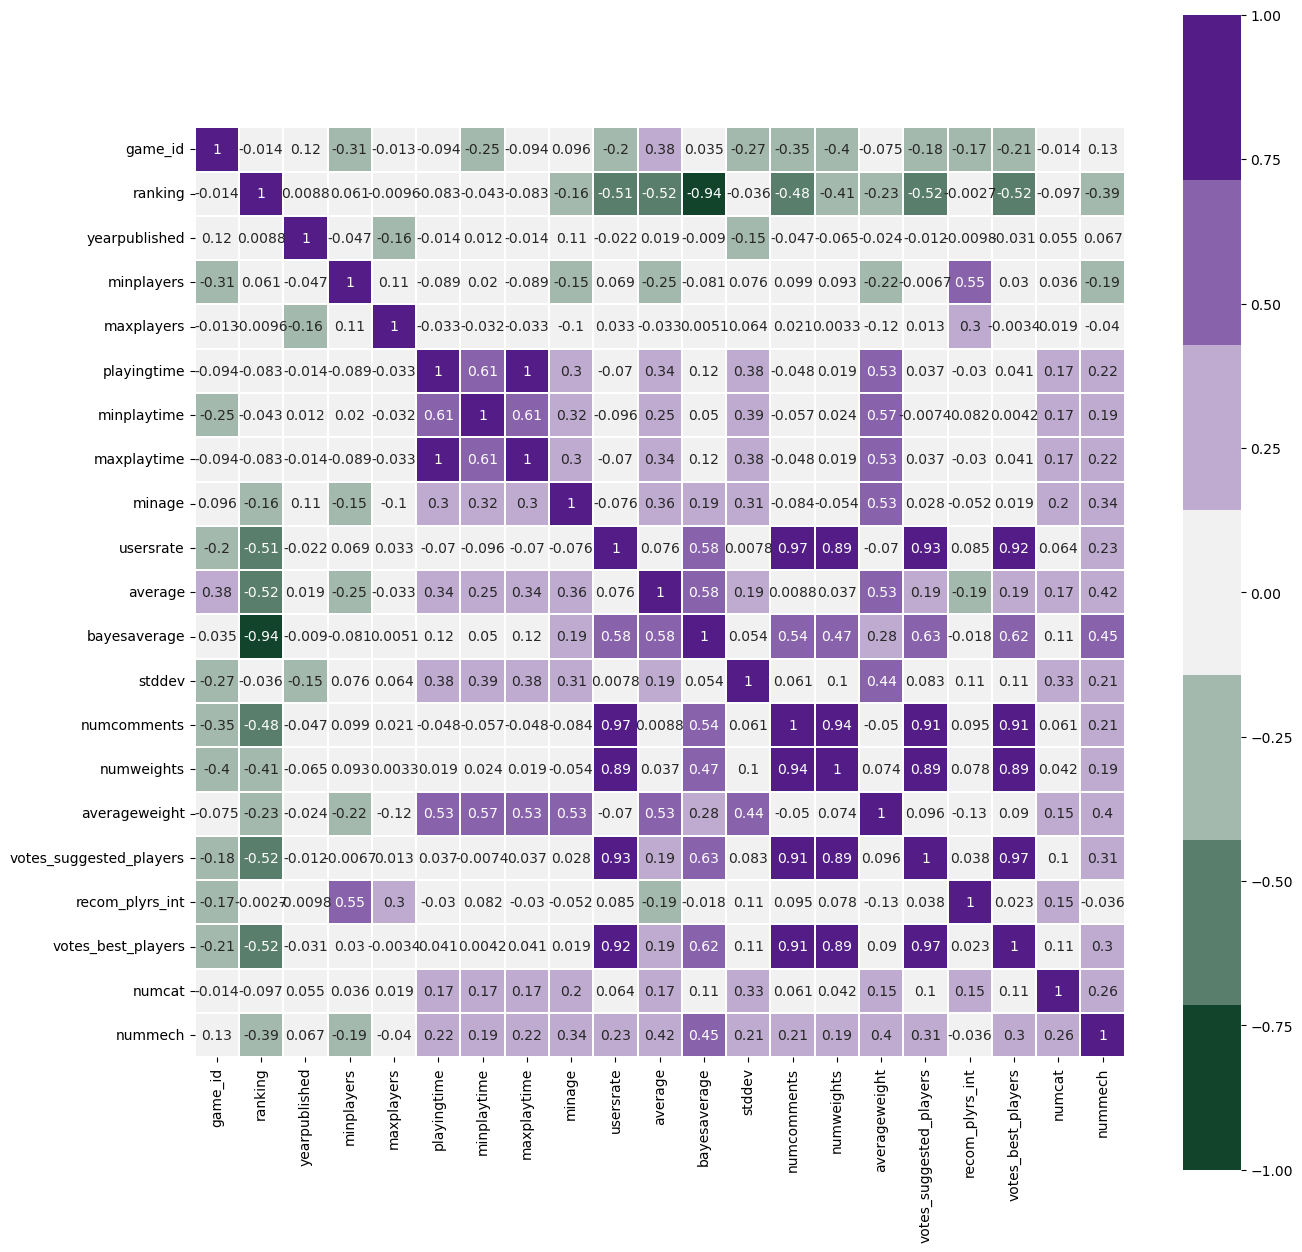

In [ ]:
plt.figure(figsize=(15,15))
sns.color_palette("colorblind")
sns.heatmap(BGG_df.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);

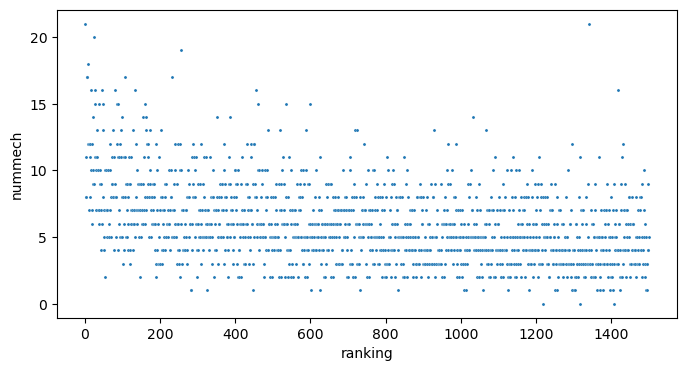

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=BGG_df['ranking'],
            y=BGG_df['nummech'],
            s=5);

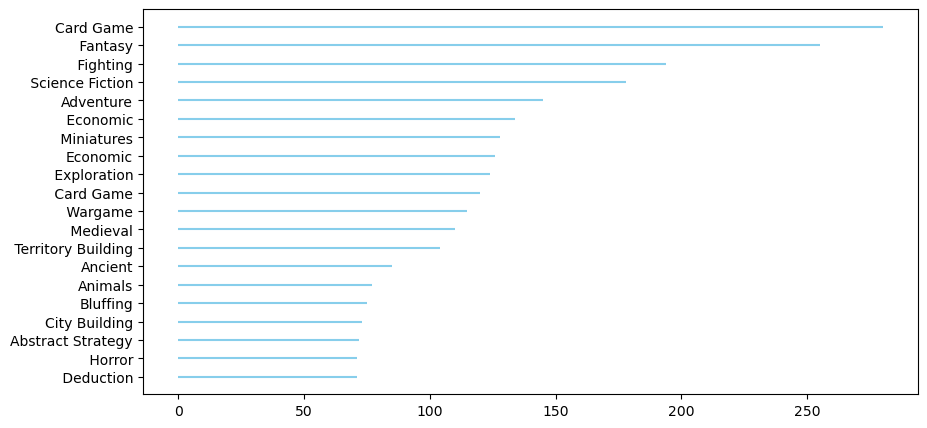

In [ ]:
plt.figure(figsize=(10,5))
plt.hlines(y=topcat.index[::-1],
           xmin=0,
           xmax=topcat.values[::-1],
           color='skyblue');

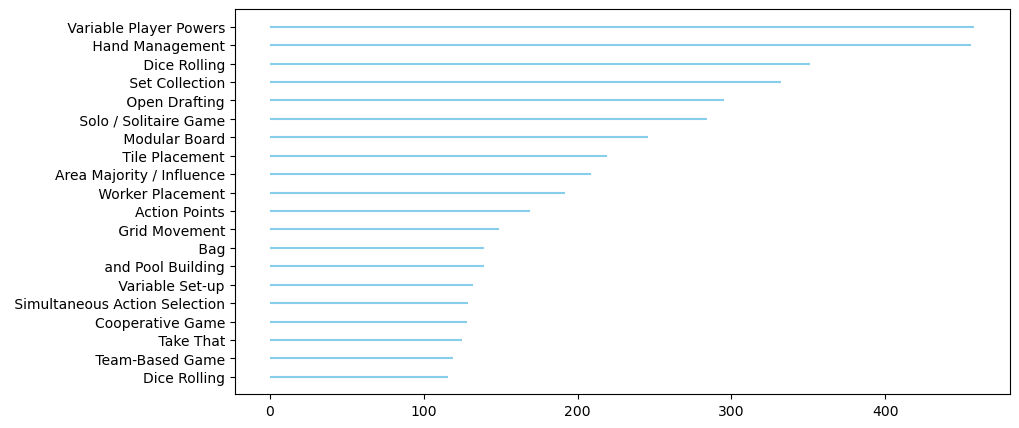

In [ ]:
plt.figure(figsize=(10,5))
plt.hlines(y=topmech.index[::-1],
           xmin=0,
           xmax=topmech.values[::-1],
           color='skyblue');
#mira dice rolling

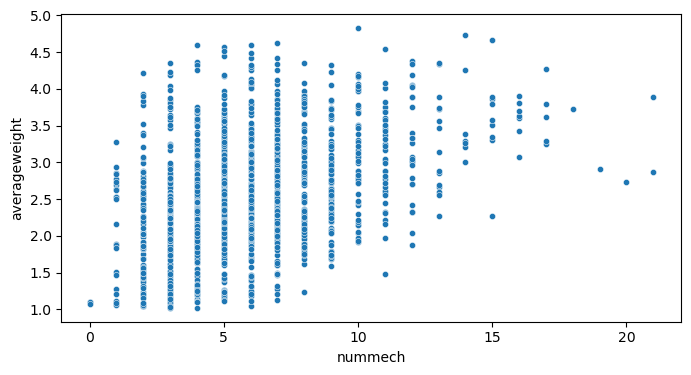

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=BGG_df['nummech'],
                y=BGG_df['averageweight'],
               s=20);           

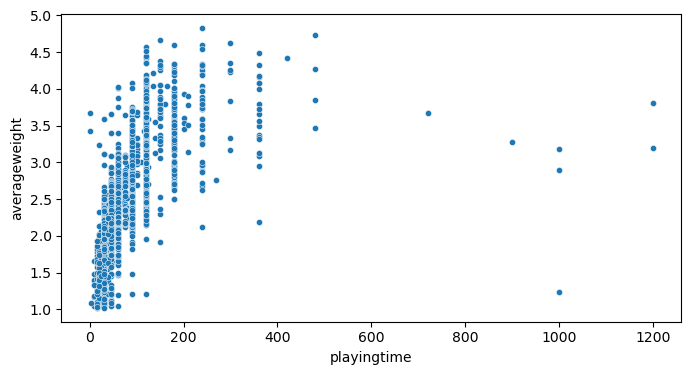

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=BGG_df['playingtime'],
                y=BGG_df['averageweight'],
               s=20);           

Graveyard

In [ ]:
'''BGG_df.keys()'''
'''recommended_players_final = []
recommended_players_final = BGG_df['recommended_players_final'].copy()
recommended_players_final[0]'''
'''#this should have been done to make sure num_players era operable
recom_plyrs_int = []

for i in recommended_players_final:
    try:
        recom_plyrs_int.append(int(i))
    except:
        recom_plyrs_int.append(int('8'))'''
'''BGG_df.keys()'''
'''recommended_players_final = []
recommended_players_final = BGG_df['recommended_players_final'].copy()
recommended_players_final[0]'''
'''#this should have been done to make sure num_players era operable
recom_plyrs_int = []

for i in recommended_players_final:
    try:
        recom_plyrs_int.append(int(i))
    except:
        recom_plyrs_int.append(int('8'))'''
'''len(recom_plyrs_int)'''
'''BGG_df.drop('recommended_players_final', axis = 1, inplace = True)
#df.drop('column_name', axis=1, inplace=True)'''
'''BGG_df['best_with'] = recom_plyrs_int
#df['Address'] = address'''
'''BGG_df.info()'''